In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements'

## refs previous day - vac & novac 🤯

In [2]:
prev_day_novac = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220420_steeplate_01_ref_novac.txt')
prev_day_novac = tdu.df_convert_unix_to_datetime(prev_day_novac)

In [3]:
# tdp.plot_data_vs_time(prev_day_novac)
# tdp.ts_hist(prev_day_novac)
# plt.yscale('log')

In [4]:
prev_outliers = prev_day_novac[prev_day_novac.z > -100]

the first point of the hexagon seems to give systematically a wrong result, compare with same_outlieres, even the id is identical 

In [5]:
prev_outliers.head(3)

run_nr  hex_nr  point      x      y       z   unix_time  \
778        1       2      1 -61.01   4.24 -11.282  1650464401   
2338       1       4      1  36.87 -52.27 -29.907  1650464875   
3118       1       5      1  69.49   4.24 -12.063  1650465115   

                      datetime  
778  2022-04-20 16:20:01+02:00  
2338 2022-04-20 16:27:55+02:00  
3118 2022-04-20 16:31:55+02:00

In [6]:
prev_day_novac_pt = tdu.point_table(prev_day_novac[prev_day_novac.z < -100])

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

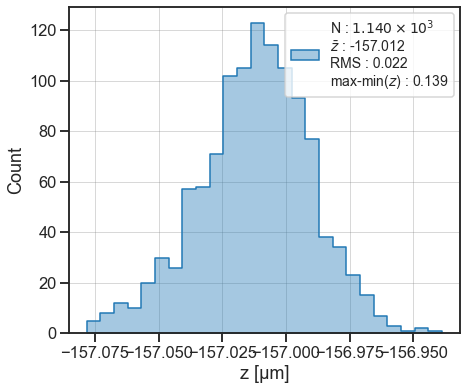

In [8]:
# tdp.plot_data_vs_time(prev_day_novac_pt)
tdp.ts_hist(prev_day_novac_pt, mode='z_mean')

In [9]:
prev_day_novac_pt = tdu.add_triplet_color_label(prev_day_novac_pt)

In [10]:
prev_day_novac_pt.head(3)

hex_nr  point     unix_time     x      y     z_err      z_mean trip_color
0       1      1  1.650464e+09  4.20   4.24  0.016315 -157.011727      white
1       1      2  1.650464e+09  3.36  12.56  0.015403 -157.005923      white
2       1      3  1.650464e+09  9.19   9.19  0.016286 -157.002615      white

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'nice plot'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

posx and posy should be finite values


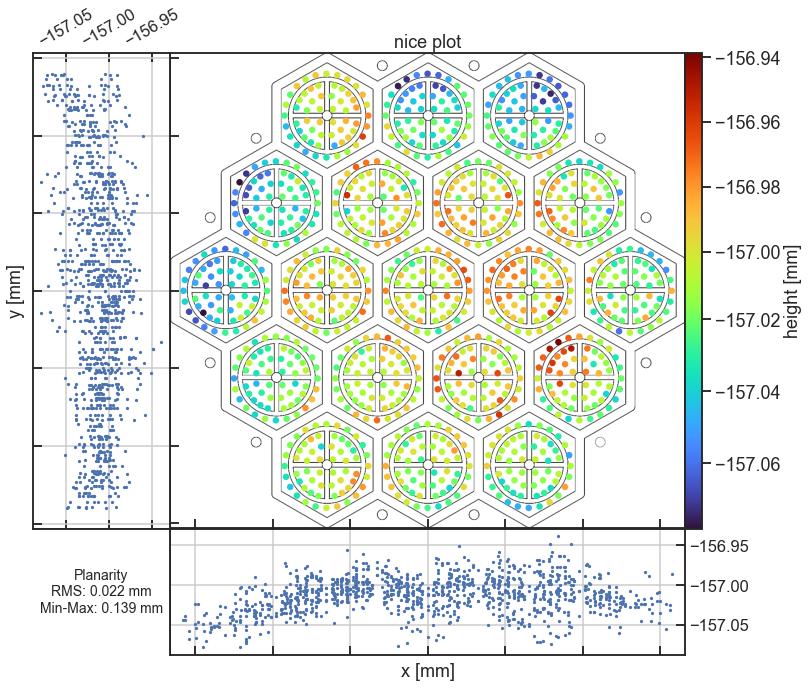

In [11]:
pn_min, pn_mean, pn_max = tdu.calc_min_mean_max(prev_day_novac_pt, mode='z_mean')
tdp.plot_table_hexagon_flatness(prev_day_novac_pt, figsize=(12,12),
                                cbar_norm=(pn_min, pn_mean, pn_max), offset=0.01, title='nice plot',
                                size=5**2,
                                unit='mm')

In [12]:
prev_day_vac = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220420_steeplate_01_ref_vac.txt')
prev_day_vac = tdu.df_convert_unix_to_datetime(prev_day_vac)

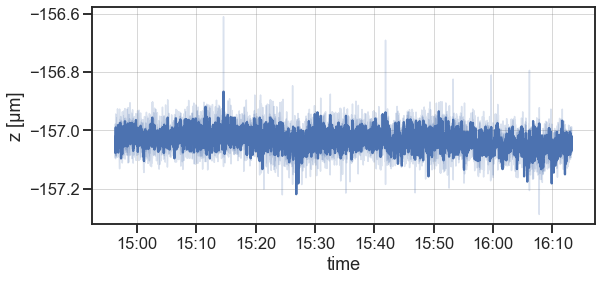

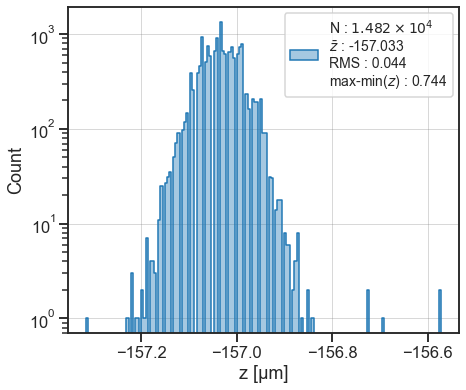

In [13]:
tdp.plot_data_vs_time(prev_day_vac)
tdp.ts_hist(prev_day_vac)
plt.yscale('log')

In [14]:
prev_day_vac_pt = tdu.point_table(prev_day_vac)

In [16]:
ref_prev_day = tdu.combine_mean_measurements(prev_day_novac_pt, prev_day_vac_pt)

In [17]:
ref_prev_day.z_mean = tdu.subtract_mean(ref_prev_day.z_mean)
ref_prev_day.z_mean = tdu.convert_mm_to_microns(ref_prev_day.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

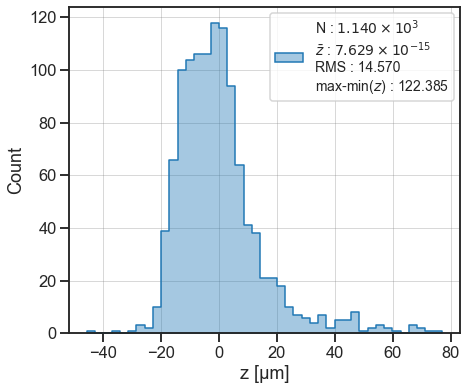

In [18]:
tdp.ts_hist(ref_prev_day, mode='z_mean')

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Vacuum vs No Vacuum Difference Plot - Day before'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

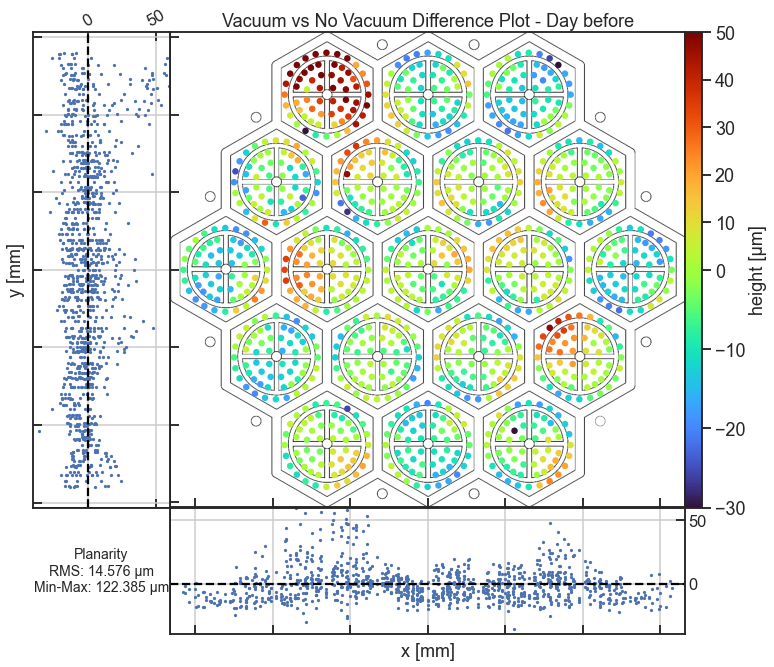

In [19]:
tdp.plot_table_hexagon_flatness(ref_prev_day,cbar_norm=(-30,0,50), offset=10,
                                title='Vacuum vs No Vacuum Difference Plot - Day before' )

## ref novac & vac 

In [20]:
same_day_novac = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220421_steeplate_01_ref_novac.txt')
same_day_novac = tdu.df_convert_unix_to_datetime(same_day_novac)

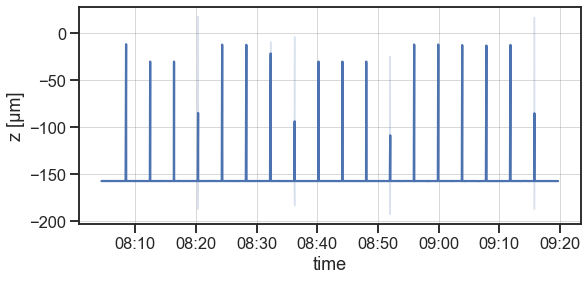

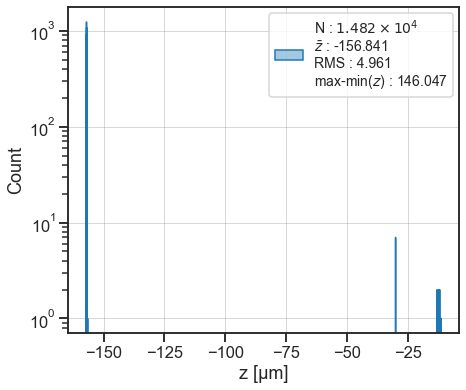

In [21]:
tdp.plot_data_vs_time(same_day_novac)
tdp.ts_hist(same_day_novac)
plt.yscale('log')

In [22]:
same_outliers = same_day_novac.loc[same_day_novac.z > -100]

In [23]:
same_outliers.head(3)

run_nr  hex_nr  point      x      y       z   unix_time  \
778        1       2      1 -61.01   4.24 -11.379  1650521310   
1558       1       3      1 -28.39 -52.27 -29.907  1650521548   
2338       1       4      1  36.87 -52.27 -29.907  1650521784   

                      datetime  
778  2022-04-21 08:08:30+02:00  
1558 2022-04-21 08:12:28+02:00  
2338 2022-04-21 08:16:24+02:00

In [24]:
same_day_novac = same_day_novac.loc[same_day_novac.z < -100]

In [25]:
same_day_novac.head(3)

run_nr  hex_nr  point     x     y        z   unix_time  \
0       1       1      1  4.68  4.49 -157.066  1650521067   
1       1       1      1  4.49  4.68 -157.029  1650521067   
2       1       1      1  4.24  4.74 -157.023  1650521067   

                   datetime  
0 2022-04-21 08:04:27+02:00  
1 2022-04-21 08:04:27+02:00  
2 2022-04-21 08:04:27+02:00

In [26]:
same_day_novac_pt = tdu.point_table(same_day_novac)

In [27]:
same_day_novac_pt.head(5)

hex_nr  point     unix_time      x      y     z_err      z_mean
0       1      1  1.650521e+09   4.20   4.24  0.017616 -157.020545
1       1      2  1.650521e+09   3.36  12.56  0.016192 -157.017154
2       1      3  1.650521e+09   9.19   9.19  0.016369 -157.009615
3       1      4  1.650521e+09  12.56   3.36  0.015909 -157.019846
4       1      5  1.650521e+09  19.32   5.18  0.014854 -156.987462

In [29]:
same_day_novac_pt = tdu.df_convert_unix_to_datetime(same_day_novac_pt)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

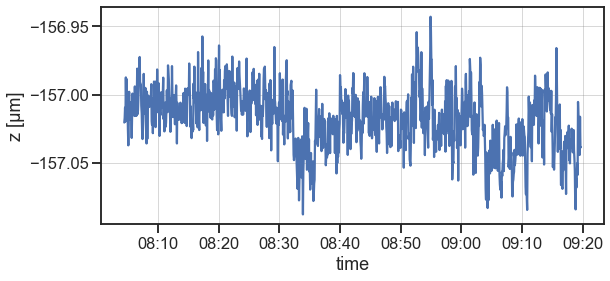

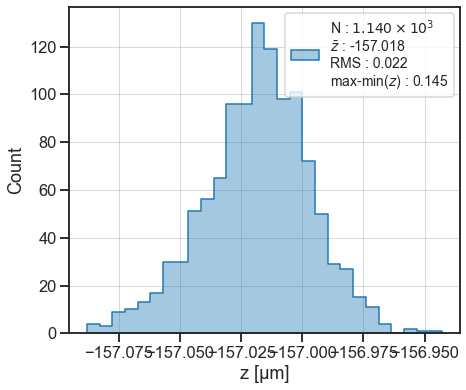

In [30]:
# bins = np.arange(same_day_novac_pt.z_mean.min(), same_day_novac_pt.z_mean.max(), 12)
tdp.plot_data_vs_time(same_day_novac_pt, mode='z_mean')
tdp.ts_hist(same_day_novac_pt, mode='z_mean')

## Before gluing

In [31]:
bfg_disk = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220421_steeplate_01_ref_vac2.txt')
bfg_disk = tdu.df_convert_unix_to_datetime(bfg_disk)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

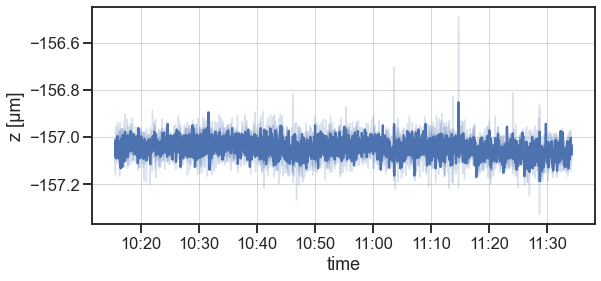

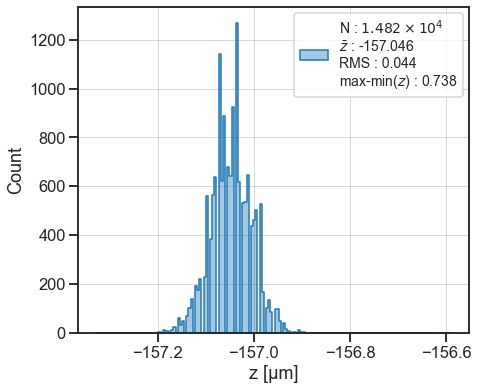

In [32]:
tdp.plot_data_vs_time(bfg_disk)
tdp.ts_hist(bfg_disk)

In [33]:
bfg_disk_pt = tdu.point_table(bfg_disk)

In [34]:
bfg_disk_pt.head(5)

hex_nr  point     unix_time      x      y     z_err      z_mean
0       1      1  1.650529e+09   4.20   4.24  0.016288 -157.059727
1       1      2  1.650529e+09   3.36  12.56  0.017365 -157.041538
2       1      3  1.650529e+09   9.19   9.19  0.014993 -157.045692
3       1      4  1.650529e+09  12.56   3.36  0.013740 -157.040077
4       1      5  1.650529e+09  19.32   5.18  0.014574 -157.035308

In [35]:
bfg_disk_pt = tdu.df_convert_unix_to_datetime(bfg_disk_pt)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

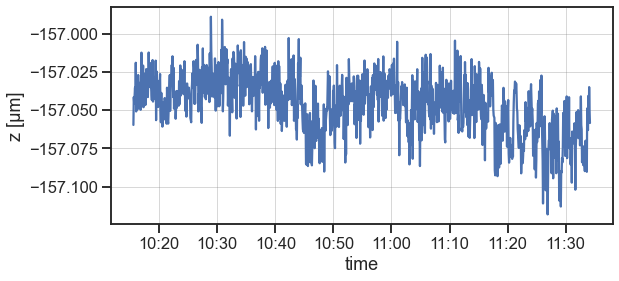

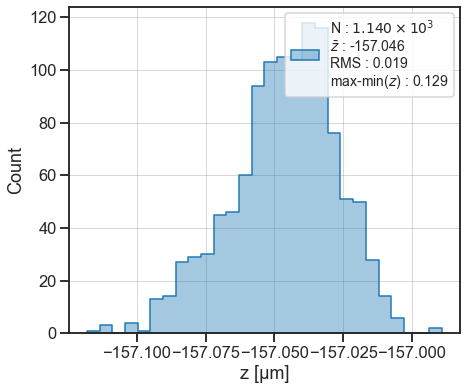

In [36]:
tdp.plot_data_vs_time(bfg_disk_pt, mode='z_mean')
tdp.ts_hist(bfg_disk_pt, mode='z_mean')

In [37]:
# bfg_disk_pt.z_mean = tdu.subtract_mean(bfg_disk_pt.z_mean)
# bfg_disk_pt.z_mean = tdu.convert_mm_to_microns(bfg_disk_pt.z_mean)

In [38]:
min_bfg, mean_bfg, max_bfg = tdu.calc_min_mean_max(bfg_disk_pt)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

posx and posy should be finite values


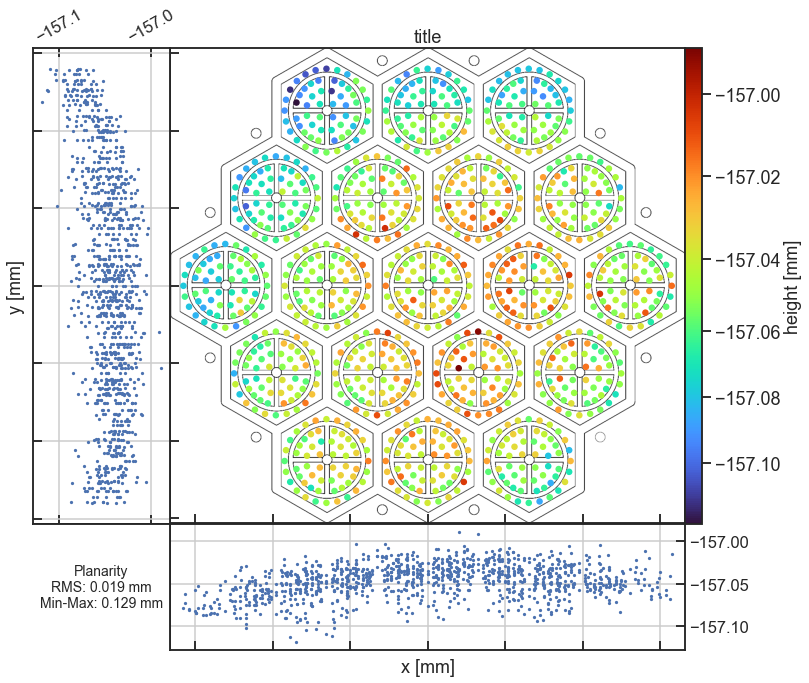

In [39]:
tdp.plot_table_hexagon_flatness(bfg_disk_pt,
                                cbar_norm=(min_bfg, mean_bfg, max_bfg),
                                offset=0.01,
                                unit='mm')

## before gluing vs before gluing novac

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Vacuum vs No Vacuum Difference Plot'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

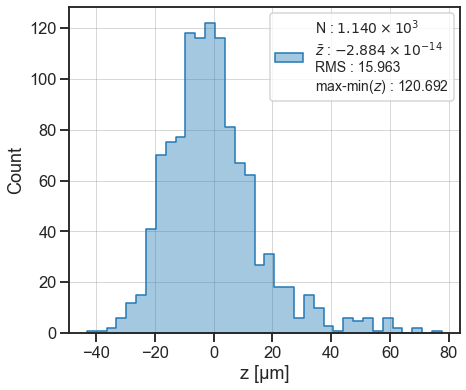

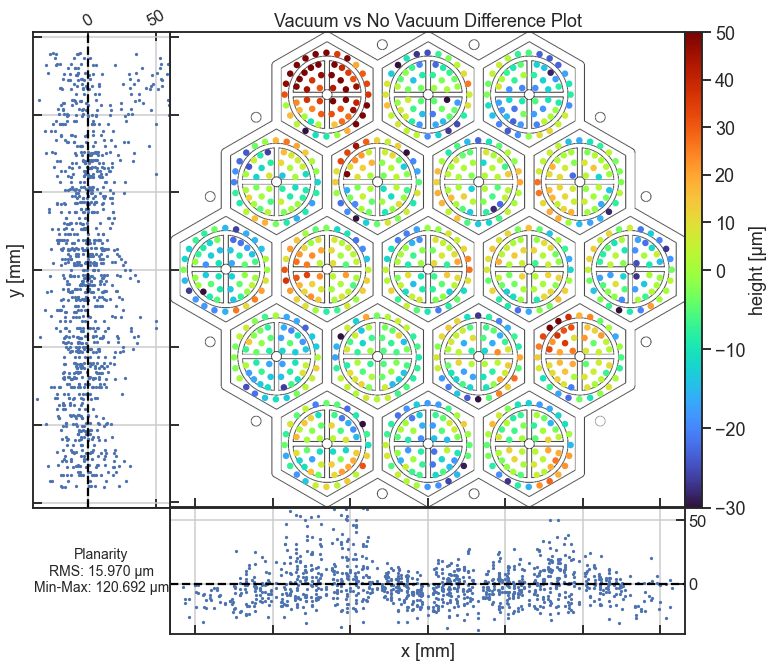

In [40]:
diff_novac_vac_pt = tdu.combine_mean_measurements(same_day_novac_pt, bfg_disk_pt)
diff_novac_vac_pt.z_mean = tdu.convert_mm_to_microns(diff_novac_vac_pt.z_mean)
diff_novac_vac_pt.z_mean = tdu.subtract_mean(diff_novac_vac_pt.z_mean)
%matplotlib inline
tdp.ts_hist(diff_novac_vac_pt, mode='z_mean')
tdp.plot_table_hexagon_flatness(diff_novac_vac_pt,
                                cbar_norm=(-30,0,50),
                                offset=10,
                                title='Vacuum vs No Vacuum Difference Plot')

## After gluing

In [41]:
ag_disk = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220421_steeplate_01_curing_bfvacr.txt')
ag_disk = tdu.df_convert_unix_to_datetime(ag_disk)

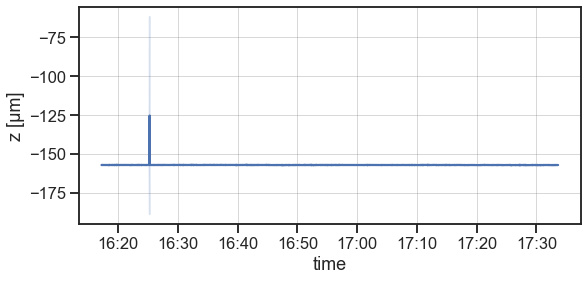

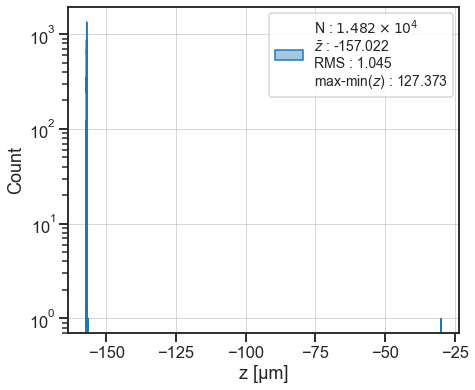

In [42]:
tdp.plot_data_vs_time(ag_disk)
tdp.ts_hist(ag_disk)
ax = plt.gca()
plt.yscale('log')

In [43]:
ag_disk = ag_disk.loc[ag_disk.z < -150,:]

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

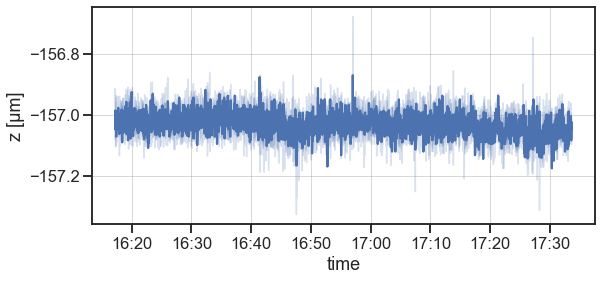

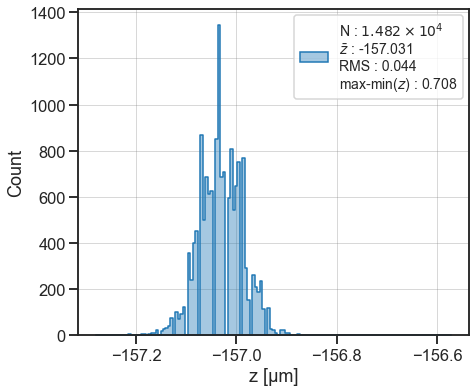

In [44]:
tdp.plot_data_vs_time(ag_disk)
tdp.ts_hist(ag_disk)

In [45]:
ag_disk_pt = tdu.point_table(ag_disk)

In [46]:
ag_disk_pt = tdu.df_convert_unix_to_datetime(ag_disk_pt)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

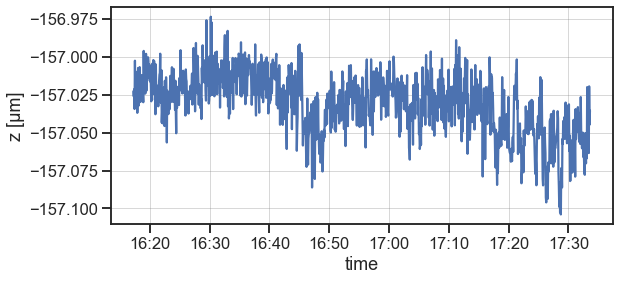

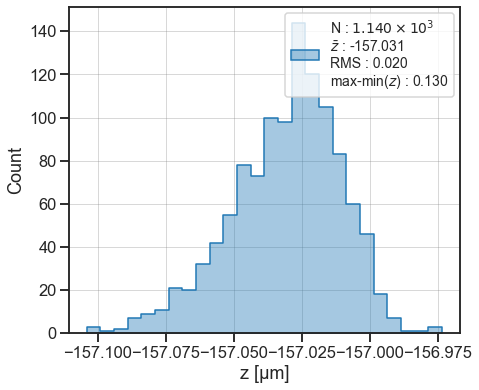

In [47]:
tdp.plot_data_vs_time(ag_disk_pt, mode='z_mean')
tdp.ts_hist(ag_disk_pt, mode='z_mean')

changes from before gluing to after gluing

In [48]:
change_bfg_ag_pt = tdu.combine_mean_measurements(ag_disk_pt, bfg_disk_pt)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

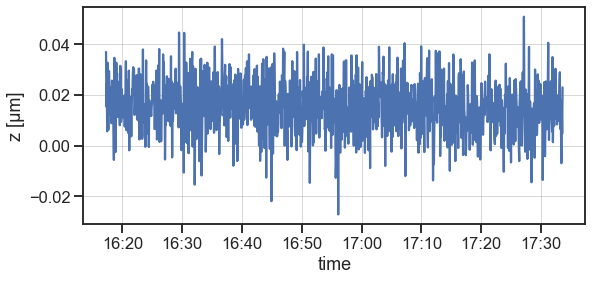

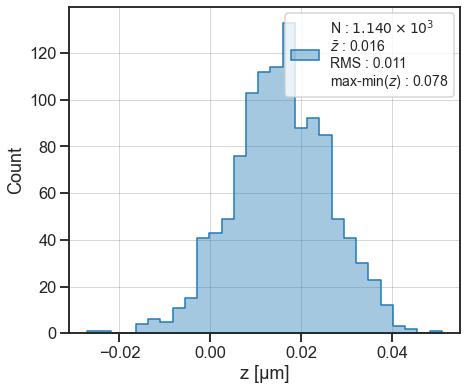

In [49]:
tdp.plot_data_vs_time(change_bfg_ag_pt, mode='z_mean')
tdp.ts_hist(change_bfg_ag_pt, mode='z_mean')

In [50]:
change_bfg_ag_pt.z_mean = tdu.convert_mm_to_microns(change_bfg_ag_pt.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

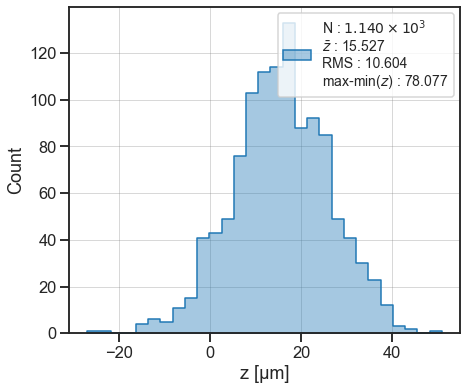

In [51]:
tdp.ts_hist(change_bfg_ag_pt, mode='z_mean')

In [52]:
change_bfg_ag_pt.z_mean = tdu.subtract_mean(change_bfg_ag_pt.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

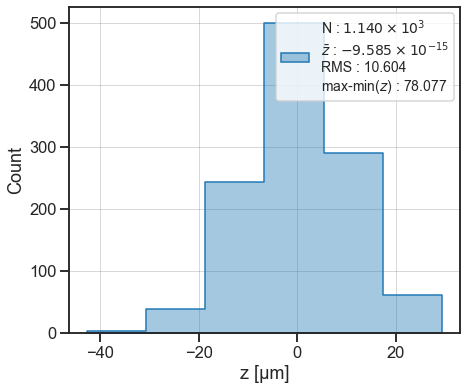

In [53]:
bins = np.arange(change_bfg_ag_pt.z_mean.min(), change_bfg_ag_pt.z_mean.max(), 12)
tdp.ts_hist(change_bfg_ag_pt, mode='z_mean',plot_bins=bins)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

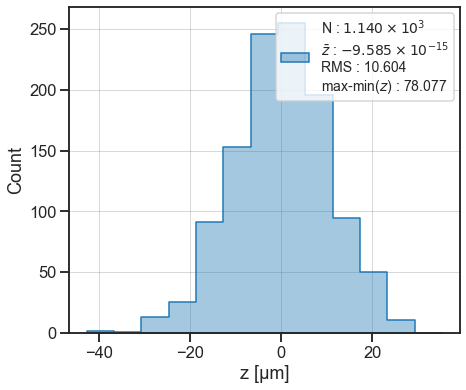

In [54]:
bins = np.arange(change_bfg_ag_pt.z_mean.min(), change_bfg_ag_pt.z_mean.max(), 6)
tdp.ts_hist(change_bfg_ag_pt, mode='z_mean',plot_bins=bins)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'After Glue - Before Glue Comparison'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

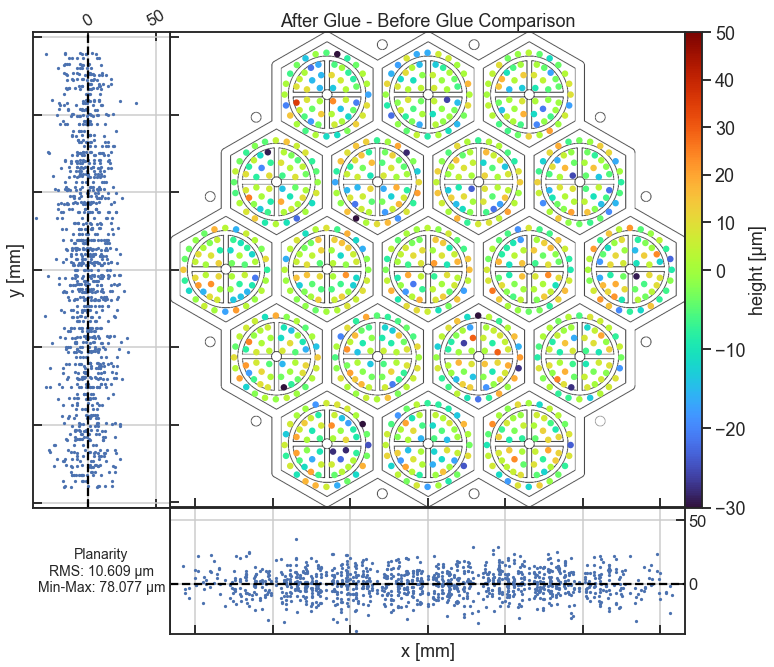

In [55]:
tdp.plot_table_hexagon_flatness(change_bfg_ag_pt,
                                cbar_norm=(-30,0,50),
                                offset=10,
                                title='After Glue - Before Glue Comparison' )

## Curing

In [56]:
curing_disk = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220421_steeplate_01_curing.txt')
curing_disk = tdu.df_convert_unix_to_datetime(curing_disk)

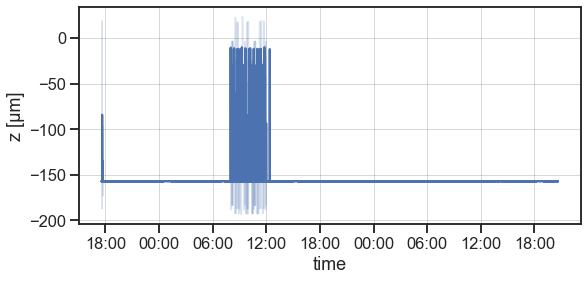

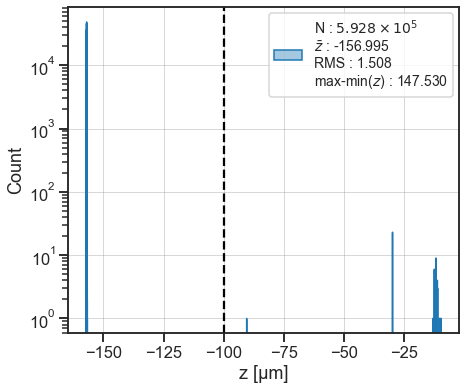

In [57]:
# %matplotlib
%matplotlib inline
tdp.plot_data_vs_time(curing_disk)
tdp.ts_hist(curing_disk)
ax = plt.gca()
ax.axvline(-100, ls='--', c='black')
plt.yscale('log')

### second peak?

In [58]:
second_peak_df = curing_disk.loc[curing_disk.z > -100,:]

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

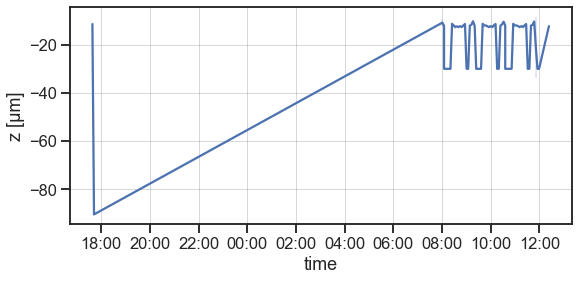

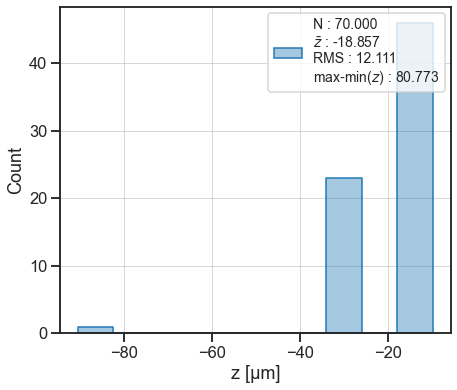

In [59]:
tdp.plot_data_vs_time(second_peak_df)
tdp.ts_hist(second_peak_df)

we have only a few outliers per run per hexagon, total number is just 70 points. 

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='x [mm]', ylabel='y [mm]'>)

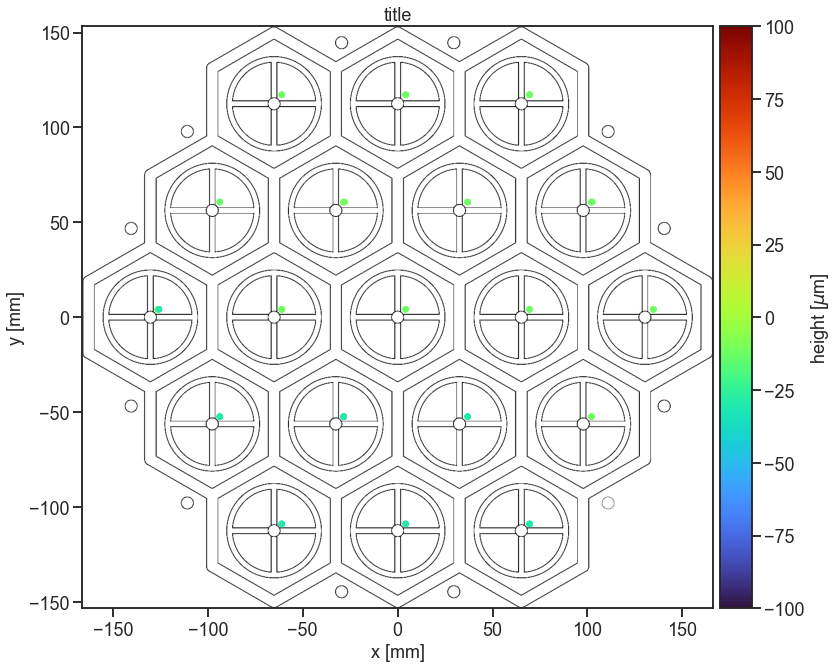

In [60]:
%matplotlib inline
tdp.full_hexagon_plot(second_peak_df, mode='z')

they occure always at the first measuring point of a hexagon

In [61]:
second_peak_df.point.unique()

array([1], dtype=int64)

## continue with curing

In [62]:
curing_disk = curing_disk.loc[curing_disk.z < -100, :]

raw data

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

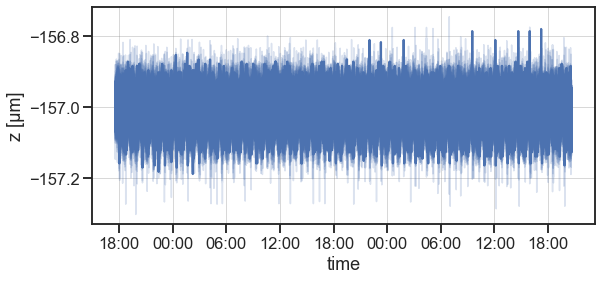

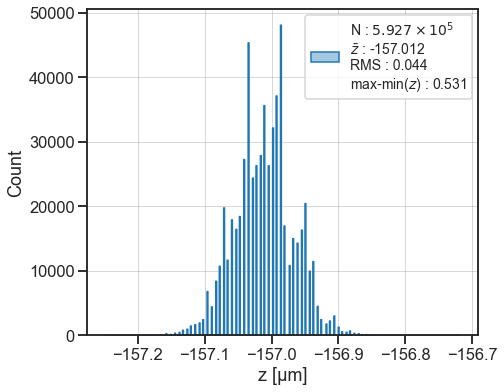

In [63]:
tdp.plot_data_vs_time(curing_disk)
tdp.ts_hist(curing_disk)

split curing data into runs

In [64]:
measurements_dict = {}
for run in curing_disk.run_nr.unique(): 
    data = curing_disk.loc[curing_disk.run_nr == run, :]
    measurements_dict[f'run_nr_{run}'] = data

mean over point_nr

In [65]:
measurements_dict_pt = {key: tdu.point_table(data) for key, data in measurements_dict.items()}

In [66]:
measurements_dict_pt['run_nr_1'].head(3)

hex_nr  point     unix_time     x      y     z_err      z_mean
0       1      1  1.650555e+09  4.20   4.24  0.018717 -157.003273
1       1      2  1.650555e+09  3.36  12.56  0.019580 -157.009692
2       1      3  1.650555e+09  9.19   9.19  0.017058 -156.997462

cosmetic aid: add run_nr to dataframe & rename the columns

In [67]:
for run_nr, data in measurements_dict_pt.items(): 
    data['run_nr'] = run_nr.split('_')[2]

subtract data before gluing form curing data per run

In [68]:
measurements_dict_pt = {key: tdu.combine_mean_measurements(data, bfg_disk_pt) for key, data in measurements_dict_pt.items()}

In [69]:
for key, data in measurements_dict_pt.items():
    data.z_mean = tdu.convert_mm_to_microns(data.z_mean)
    data.z_err = tdu.convert_mm_to_microns(data.z_err)
    data.z_mean = tdu.subtract_mean(data.z_mean)
    measurements_dict_pt[key] = data

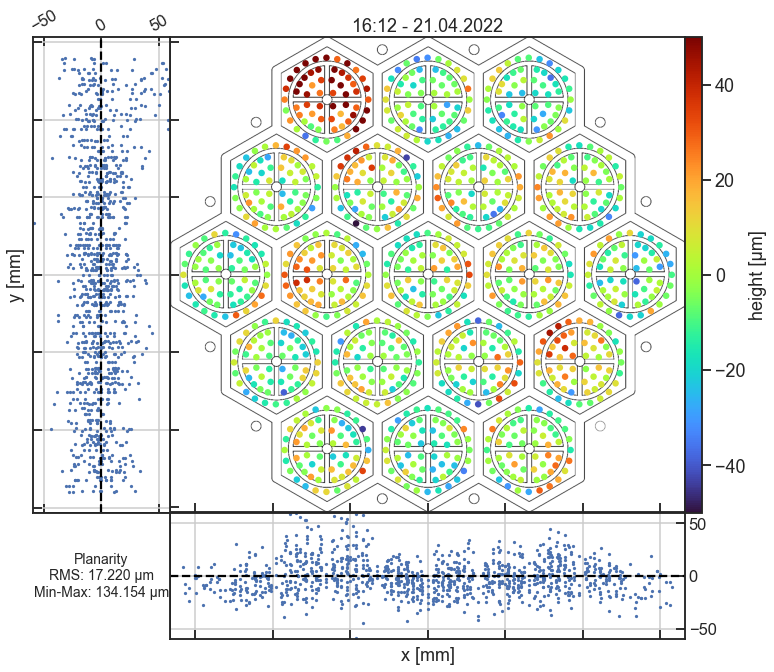

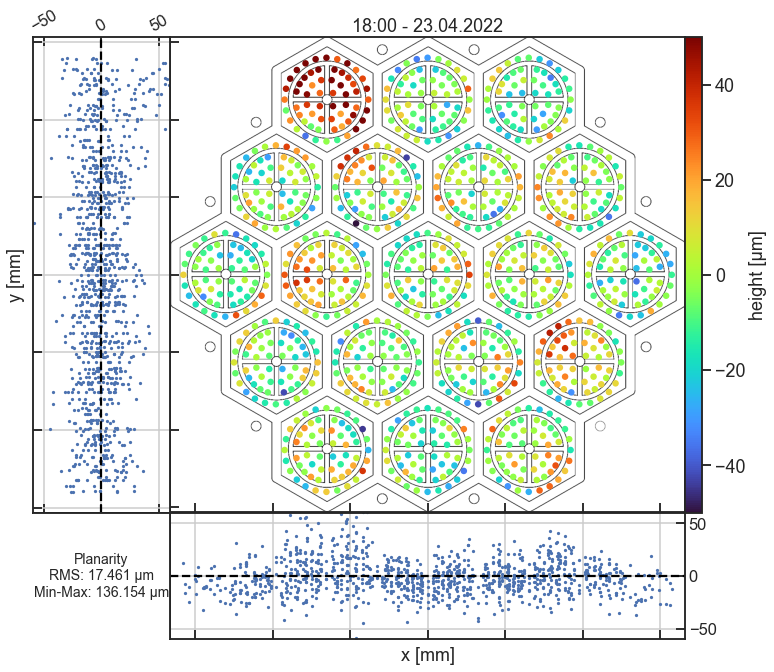

In [70]:
for key, data in measurements_dict_pt.items(): 
    run_nr = int(key.split('_')[2])
    str_datetime = tdu.calc_measurement_date_and_time(data)
    if run_nr in [0,1,40]:
        tdp.plot_table_hexagon_flatness(data, figsize= (12,12),cbar_norm=(-50,0,50), offset=10, title=f'{str_datetime}')

(<Figure size 432x1008 with 40 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='z [µm]'>], dtype=object))

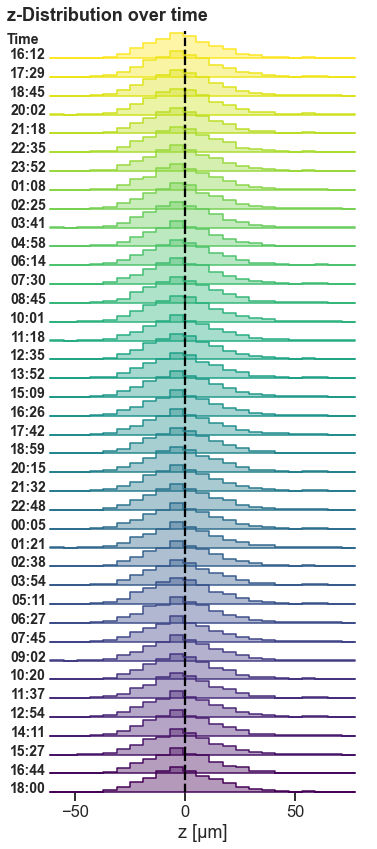

In [71]:
tdp.plot_triplet_dist_joyplot(measurements_dict_pt, time_format='%H:%M')

In [72]:
result_df = tdu.calc_flats_statistic_df(measurements_dict_pt)

(<Figure size 504x504 with 2 Axes>,
 array([<AxesSubplot:title={'center':'R vs time'}, ylabel='R: Min - Max [µm]'>,
        <AxesSubplot:title={'center':'RMS vs time'}, ylabel='RMS [µm]'>],
       dtype=object))

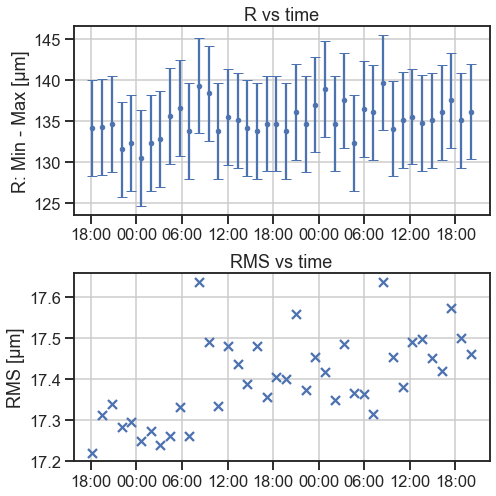

In [73]:
tdp.plot_R_RMS_vs_time(result_df)

## Plot curing with novac ref 

In [74]:
measurements_dict = {}
for run in curing_disk.run_nr.unique(): 
    data = curing_disk.loc[curing_disk.run_nr == run, :]
    measurements_dict[f'run_nr_{run}'] = data

In [75]:
measurements_dict_pt = {key: tdu.point_table(data) for key, data in measurements_dict.items()}

In [76]:
for run_nr, data in measurements_dict_pt.items(): 
    data['run_nr'] = run_nr.split('_')[2]
    data.rename(columns = {'z_nan_mean': 'z_mean', 'z_measurement_error': 'z_err'}, inplace=True)

In [77]:
measurements_dict_pt = {key: tdu.combine_mean_measurements(data, prev_day_novac_pt) for key, data in measurements_dict_pt.items()}

In [78]:
for key, data in measurements_dict_pt.items():
    data.z_mean = tdu.convert_mm_to_microns(data.z_mean)
    data.z_err = tdu.convert_mm_to_microns(data.z_err)
    data.z_mean = tdu.subtract_mean(data.z_mean)
    measurements_dict_pt[key] = data

1
40


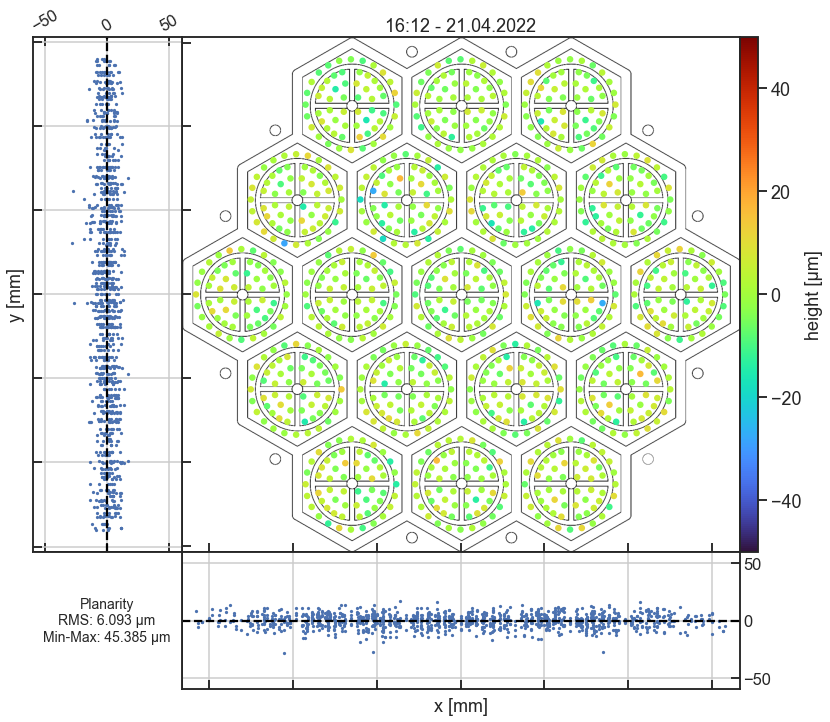

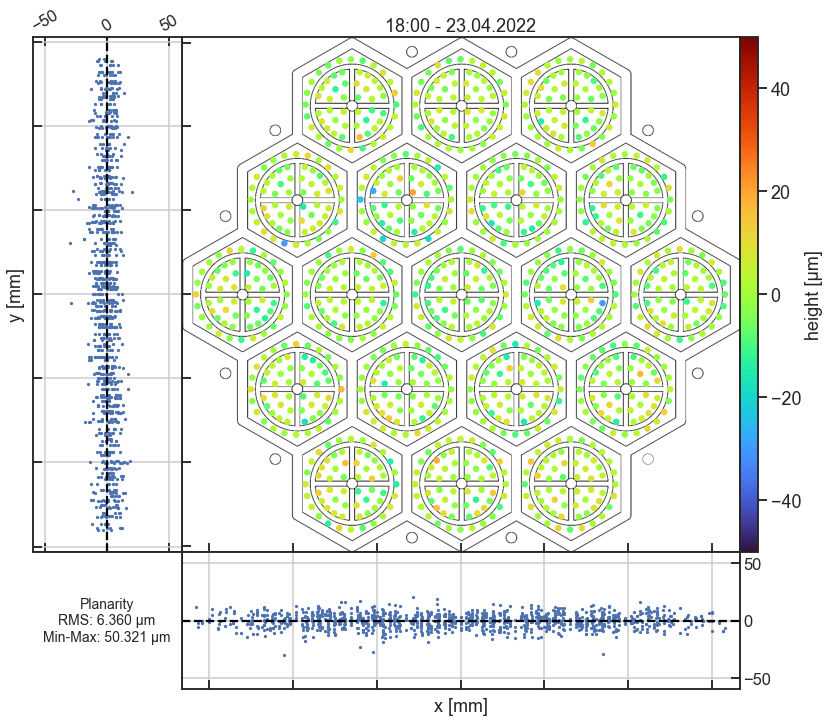

In [79]:
for key, data in measurements_dict_pt.items(): 
    run_nr = int(key.split('_')[2])
    time_str = tdu.calc_measurement_date_and_time(data)
    if run_nr in [0,1,40]:
        print(run_nr)
        tdp.plot_table_hexagon_flatness(data, figsize=(13,13),cbar_norm=(-50,0,50), offset=10, title=f'{time_str}')

(<Figure size 432x1008 with 40 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='z [µm]'>], dtype=object))

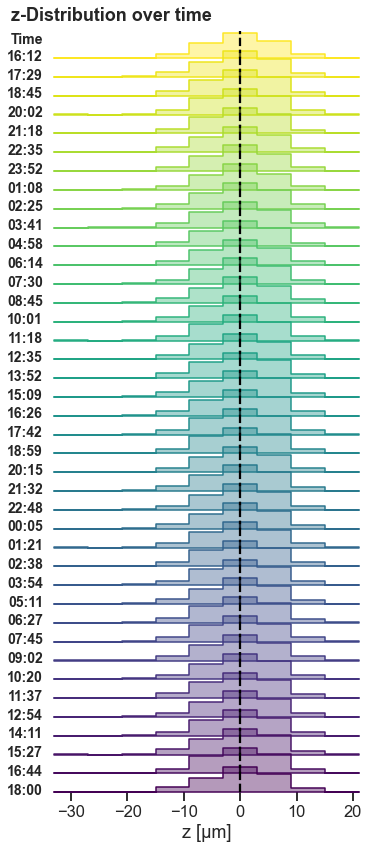

In [80]:
tdp.plot_triplet_dist_joyplot(measurements_dict_pt, time_format='%H:%M')

In [81]:
result_df = tdu.calc_flats_statistic_df(measurements_dict_pt)

(<Figure size 504x504 with 2 Axes>,
 array([<AxesSubplot:title={'center':'R vs time'}, ylabel='R: Min - Max [µm]'>,
        <AxesSubplot:title={'center':'RMS vs time'}, ylabel='RMS [µm]'>],
       dtype=object))

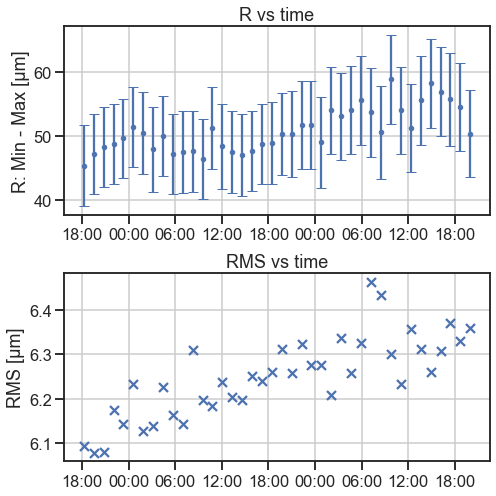

In [82]:
tdp.plot_R_RMS_vs_time(result_df)